<a href="https://colab.research.google.com/github/agayatri123/Proyek-Analisa-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Anindita Gayatri
- **Email:** agayatri123@yahoo.co.id
- **ID Dicoding:** anindita_gayatri_ukA6

## Menentukan Pertanyaan Bisnis

- Bagaimana pola pergerakan bulanan nya penyewaan sepeda ?
- Penyewa sepeda seperti apa yang memiliki kontribusi lebih besar? Penyewa terdaftar (registered) atau non-registered (casual) ?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# load the dataset
df_hour= pd.read_csv('sample_data/hour.csv')

**Insight:**
- Walau terdapat sumber pengambilan dataset yang terpercaya seperti UCI, Google Datasearch dan sebagainya, namun dipilih mengambil data dari Kaggle.
- Dipilih menggunakan cara upload dataset di Notebook di folder sample_data, walau ada pilihan lain seperti via URL, access ke github, dsb.

### Assessing Data

In [6]:
# Melihat summary dari struktur data hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Melihat kolom mana saja yang Numeric
num_col=[]
for col in df_hour.columns:
    if(df_hour[col].dtypes!='object'):
        num_col.append(col)
        #print(f"There are total {len(num_col)} numerical columns in dataset")
print(num_col)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [8]:
# Melihat kolom mana saja yang Categorical
cat_col=[]
for col in df_hour.columns:
    if(df_hour[col].dtypes=='object'):
        cat_col.append(col)
print(f"There are total {len(cat_col)} categorical columns in dataset")
print(cat_col)

There are total 1 categorical columns in dataset
['dteday']


In [10]:
# Check data yang terduplikasi
df_hour.duplicated().sum()

0

**Insight:**
- Kondisi Data
Total Baris Data: 17,379 entries
Memori yang Digunakan: 2.3+ MB

- Terdiri dari 17 kolom feature data yaitu
  - instant     (int64)  
  - dteday      (object)
  - season      (int64)  
  - yr          (int64)  
  - mnth        (int64)  
  - hr          (int64)  
  - holiday     (int64)  
  - weekday     (int64)  
  - workingday  (int64)  
  - weathersit  (int64)  
  - temp        (float64)
  - atemp       (float64)
  - hum         (float64)
  - windspeed   (float64)
  - casual      (int64)  
  - registered  (int64)  
  - cnt         (int64)     


### Cleaning Data

In [11]:
# Check missing value dengan fungsi isnull()
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
# Men-drop data kosong walau sebenarnya tidak ditemukan data yang kosong
df_hour.dropna(axis=0, inplace=True)

In [14]:
# Men-drop data yang terduplikasi walau sebenarnya tidak ditemukan data yang terduplikasi
df_hour.drop_duplicates(inplace=True)

In [39]:
# Mengecek Season atau Musim yang unik
df_hour.season.unique()

array([1, 2, 3, 4])

**Insight:**
- Status missing values:
  - Tidak ada
- Walau tidak ada missing values dan duplikasi, tetap dilakukan cleaning. Sehingga hasilnya tetap sama karena tidak ada data yang ter-drop.
- Terdapat 4 musim yang unik, ditandai dengan penomoran 1,2, 3 dan 4.

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

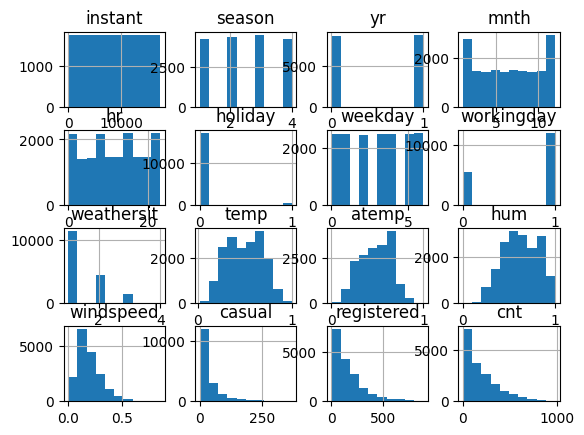

In [18]:
# Melihat distribusi data secara cepat
df_hour.hist()

In [20]:
# Mengelompokkan data
df_hour.groupby(by="mnth").max()

,instant,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,,,
1,9386,2012-01-31,1,1,23,1,6,1,4,0.58,0.5455,1.00,0.6567,156,518,559
2,10078,2012-02-29,1,1,23,1,6,1,3,0.66,0.6212,1.00,0.8060,229,567,610
3,10821,2012-03-31,2,1,23,0,6,1,3,0.72,0.6515,1.00,0.6866,367,693,957
4,11539,2012-04-30,2,1,23,1,6,1,3,0.80,0.6970,1.00,0.7164,355,697,822
5,12283,2012-05-31,2,1,23,1,6,1,3,0.90,0.8333,1.00,0.6119,361,770,873
6,13003,2012-06-30,3,1,23,0,6,1,3,0.98,0.9242,1.00,0.5821,297,796,900
7,13747,2012-07-31,3,1,23,1,6,1,3,1.00,1.0000,0.94,0.8507,269,790,913
8,14491,2012-08-31,3,1,23,0,6,1,3,0.92,0.8485,0.94,0.8358,289,811,941
9,15211,2012-09-30,4,1,23,1,6,1,3,0.86,0.7879,1.00,0.6418,350,886,977


In [21]:
# Pembulatan kolom temperatur sesuai Celcius
df_hour["temp"] = df_hour["temp"]*100

In [22]:
# Melihat kembali kolom temp (temperatur) setelah dibuatkan sesuai Celcius
df_hour.groupby(by="mnth").max()

,instant,dteday,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,,,,,,,,,,,,,,,,
1,9386,2012-01-31,1,1,23,1,6,1,4,58.0,0.5455,1.00,0.6567,156,518,559
2,10078,2012-02-29,1,1,23,1,6,1,3,66.0,0.6212,1.00,0.8060,229,567,610
3,10821,2012-03-31,2,1,23,0,6,1,3,72.0,0.6515,1.00,0.6866,367,693,957
4,11539,2012-04-30,2,1,23,1,6,1,3,80.0,0.6970,1.00,0.7164,355,697,822
5,12283,2012-05-31,2,1,23,1,6,1,3,90.0,0.8333,1.00,0.6119,361,770,873
6,13003,2012-06-30,3,1,23,0,6,1,3,98.0,0.9242,1.00,0.5821,297,796,900
7,13747,2012-07-31,3,1,23,1,6,1,3,100.0,1.0000,0.94,0.8507,269,790,913
8,14491,2012-08-31,3,1,23,0,6,1,3,92.0,0.8485,0.94,0.8358,289,811,941
9,15211,2012-09-30,4,1,23,1,6,1,3,86.0,0.7879,1.00,0.6418,350,886,977


In [23]:
# Melihat urutan jumlah pemakai sepeda per hari dari urutan terbanyak
df_hour.sort_values(by="registered", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,66.0,0.6212,0.44,0.2537,91,886,977
14964,14965,2012-09-20,3,1,9,17,0,4,1,1,64.0,0.6212,0.50,0.2239,91,885,976
15780,15781,2012-10-24,4,1,10,17,0,3,1,1,66.0,0.6212,0.47,0.0000,87,876,963
15108,15109,2012-09-26,4,1,9,17,0,3,1,1,74.0,0.6667,0.48,0.2985,77,876,953
15756,15757,2012-10-23,4,1,10,17,0,2,1,1,68.0,0.6364,0.41,0.0000,67,871,938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,34.0,0.3182,0.00,0.2537,3,0,3
2119,2120,2011-04-03,2,0,4,4,0,0,0,1,28.0,0.3030,0.70,0.0896,3,0,3
1161,1162,2011-02-21,1,0,2,4,1,1,0,1,32.0,0.3182,0.45,0.1642,1,0,1
6134,6135,2011-09-18,3,0,9,4,0,0,0,1,44.0,0.4394,0.77,0.2239,1,0,1


**Insight:**
- Kolom dteday tidak dapat dicari rata-rata, quartil atas, quartil bawah, max, dsb dikarenakan bukan data numeric. Melainkan data categorical.
- Saat melihat distribusi data secara cepat, karena kolom registered dan casual dibutuhkan untuk menjawab pertanyaan, maka saat dilihat ternyata distribusi nya tidak merata.
- Secara harian penyewaan ternyata TOP5 terjadi 3x di bulan Sep & 2x di bulan Nov.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

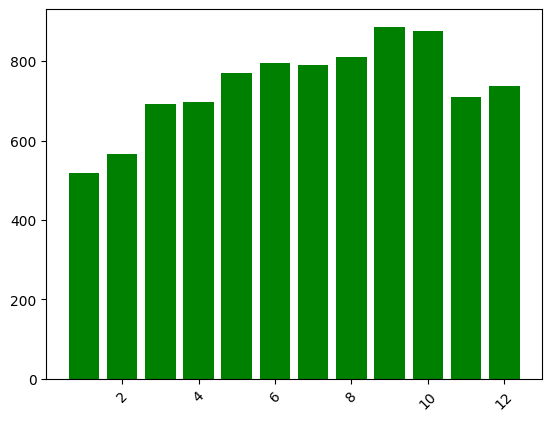

In [24]:
# Pada bulan apa pemakaian sewa sepeda terbanyak ?

# Penyajian bentuk Bar chart

plt.bar(x=df_hour['mnth'], height=df_hour['registered'], color='green')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

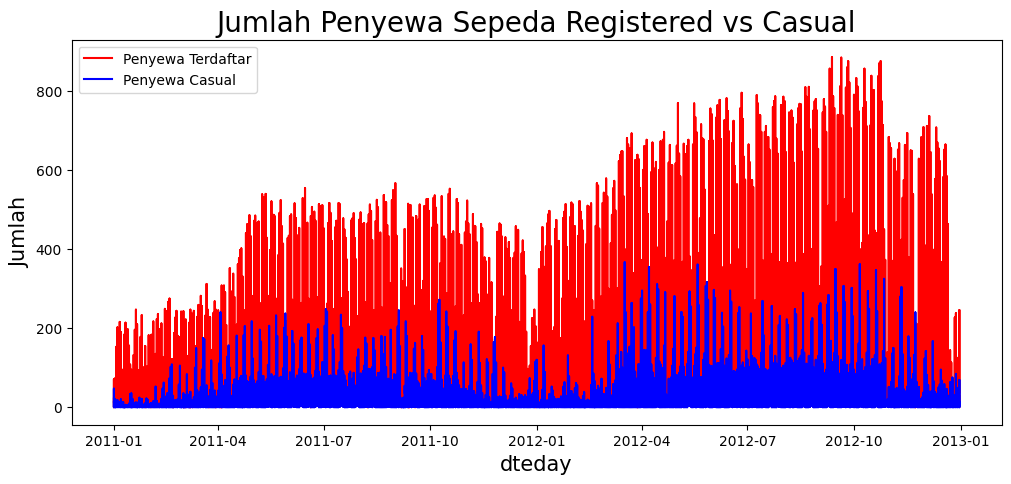

In [38]:
# Lebih banyak mana penyewa sepeda dari yang sudah terdaftar (registered) dibandingkan penyewa yang tidak terdaftar (casual) ?

# Explanatory Analysis

import pandas as pd
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

plt.figure(figsize=(12, 5))
plt.plot(df_hour['dteday'], df_hour['registered'], label='Penyewa Terdaftar', color='red')
plt.plot(df_hour['dteday'], df_hour['casual'], label='Penyewa Casual', color='blue')
plt.title('Jumlah Penyewa Sepeda Registered vs Casual', size=20)
plt.xlabel('dteday',size=15)
plt.ylabel('Jumlah',size=15)
plt.legend()
plt.show()

**Insight:**
- Ternyata penyewaan sepeda tertinggi terjadi di bulan 8,9 dan 10 yaitu Agustus, Sep dan Oct dimana ini adalah musim panas.  
- Ternyata didapatkan penyewa sepeda terdaftar (registered) konsisten selalu lebih banyak dibandingkan penyewa yang tidak terdaftar (casual) dalam musim apapun.